In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle_telco

Exercises I - Required
Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Explore your dataset with any other visualizations you think will be helpful.

In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [2]:
df = wrangle_telco.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [3]:
train, validate, test = wrangle_telco.train_validate_test(df)

train shape:  (1212, 4) , validate shape:  (304, 4) , test shape:  (169, 4)

train percent:  72.0 , validate percent:  18.0 , test percent:  10.0


In [4]:
def months_to_years(df):
    """
    Takes in the telco df and returns the df with new 
    categorical feature 'tenure_years'
    """
    df['tenure_years'] = round(df.tenure // 12)
    df['tenure_years'] = df.tenure_years.astype('object')
    return df

In [5]:
df = months_to_years(df)
df.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5
1,0014-BMAQU,84.65,63,5377.80,5
2,0016-QLJIS,90.45,65,5957.90,5
3,0017-DINOC,45.20,54,2460.55,4
4,0017-IUDMW,116.80,72,8456.75,6


In [6]:
telco_cols = ['monthly_charges', 'tenure', 'total_charges']
descriptive = {'monthly_charges': 'Monthly Charges ($)',
               'tenure': 'Tenure (months)',
               'total_charges': 'Total Charges ($)',
               'tenure_years': 'Tenure (years)',
              '':''}

In [7]:
def plot_variable_pairs(df):
    """Takes a DataFrame and all of the pairwise relationships along with the regression line for each pair"""
    sns.pairplot(df, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.9}})

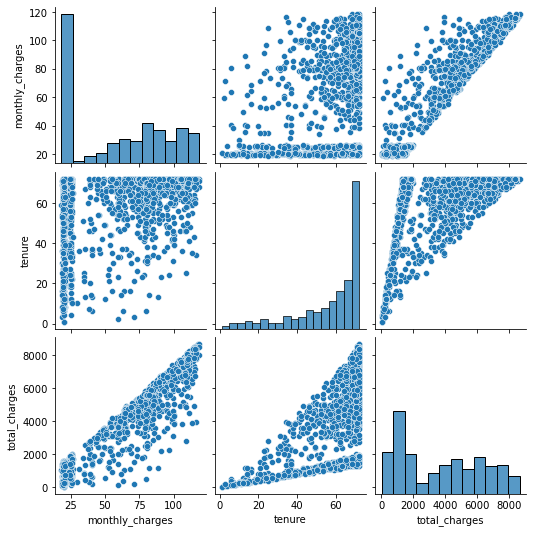

In [8]:
pairplot = sns.pairplot(train[telco_cols])
pairplot